<a href="https://colab.research.google.com/github/Netri-100224/ProvothonML/blob/main/Provothon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import StandardScaler

#Train Test
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
student = pd.read_csv('/content/xAPI-Edu-Data.csv')

In [37]:
student.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [38]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [39]:
student.nunique()

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
raisedhands                 82
VisITedResources            89
AnnouncementsView           88
Discussion                  90
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

In [40]:
student['Class'].replace('L', 0,inplace=True)
student['Class'].replace('M', 1,inplace=True)
student['Class'].replace('H', 2,inplace=True)

<Axes: xlabel='Class', ylabel='count'>

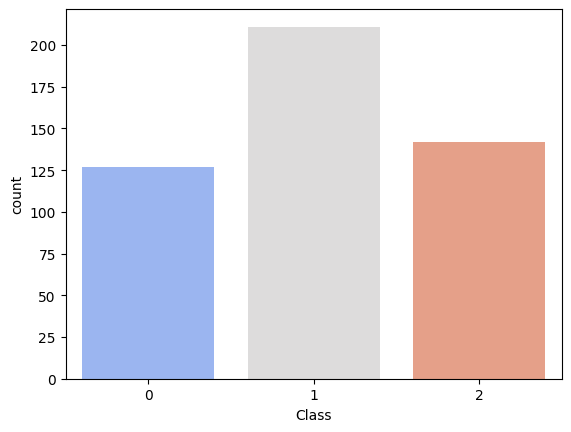

In [41]:
sns.countplot(x='Class',data=student,palette='coolwarm')


<Axes: xlabel='Class', ylabel='count'>

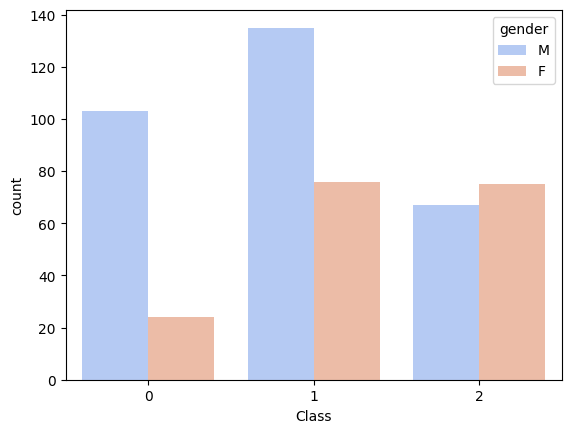

In [42]:
sns.countplot(x='Class',hue='gender',data=student,palette='coolwarm')

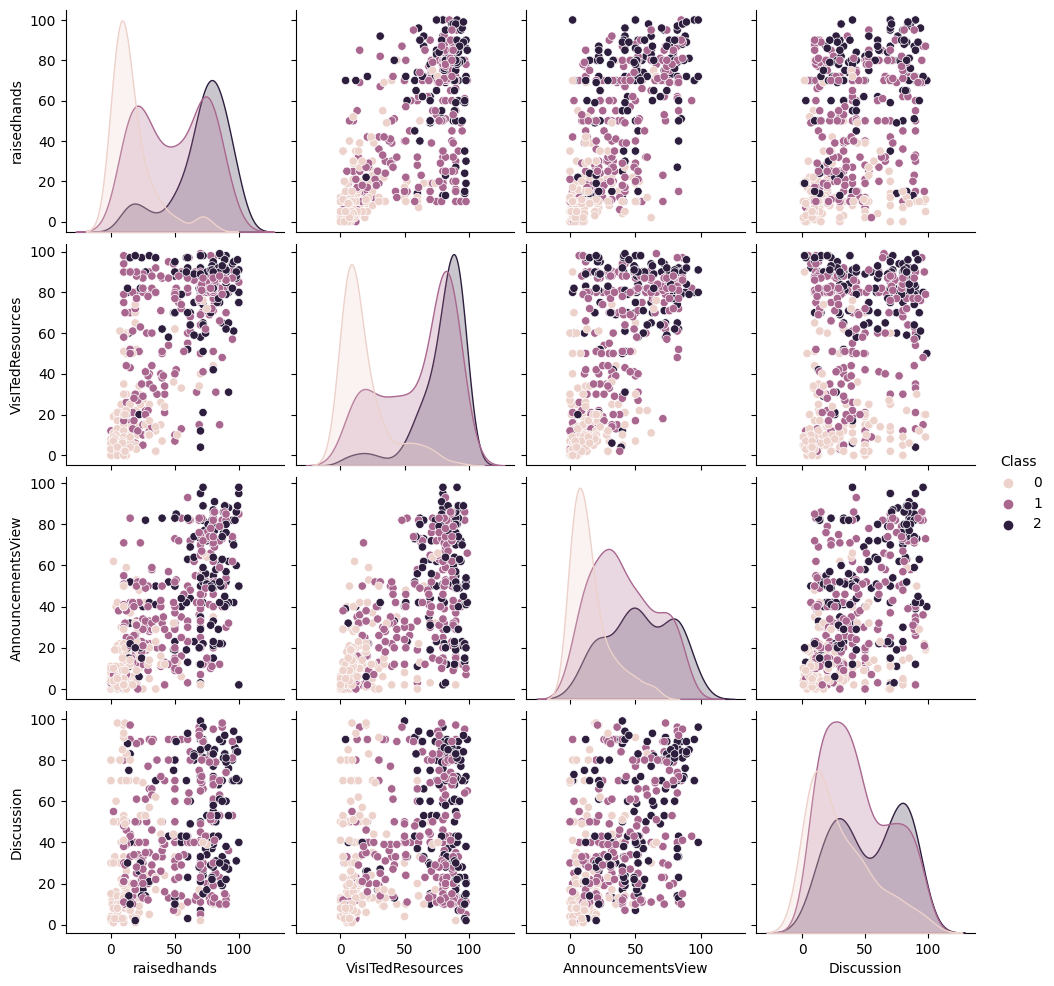

In [43]:
sns.pairplot(student,hue='Class')

In [44]:

# categorical values > numerical

student['gender'].replace('M', 0,inplace=True)
student['gender'].replace('F', 1,inplace=True)

In [45]:
nat = pd.get_dummies(student['NationalITy'])
sid = pd.get_dummies(student['StageID'])
gid = pd.get_dummies(student['GradeID'])
secid = pd.get_dummies(student['SectionID'])
topic = pd.get_dummies(student['Topic'])
semester = pd.get_dummies(student['Semester'])
rel = pd.get_dummies(student['Relation'])
pas = pd.get_dummies(student['ParentAnsweringSurvey'])
pss = pd.get_dummies(student['ParentschoolSatisfaction'])
sab = pd.get_dummies(student['StudentAbsenceDays'])

In [46]:
student.drop(['NationalITy','PlaceofBirth','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester',
              'Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays'],axis=1,inplace=True)

In [47]:
student = pd.concat([student,nat,sid,gid,secid,topic,semester,rel,pas,pss,sab],axis=1)

In [48]:
Label = student['Class']

Features = student[['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion','Father', 'Mum', 'No', 'Yes', 'Bad', 'Good',
       'Above-7', 'Under-7']]

In [49]:
scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

In [50]:
X = scaled
y = Label
# train 80% test,20%, random state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

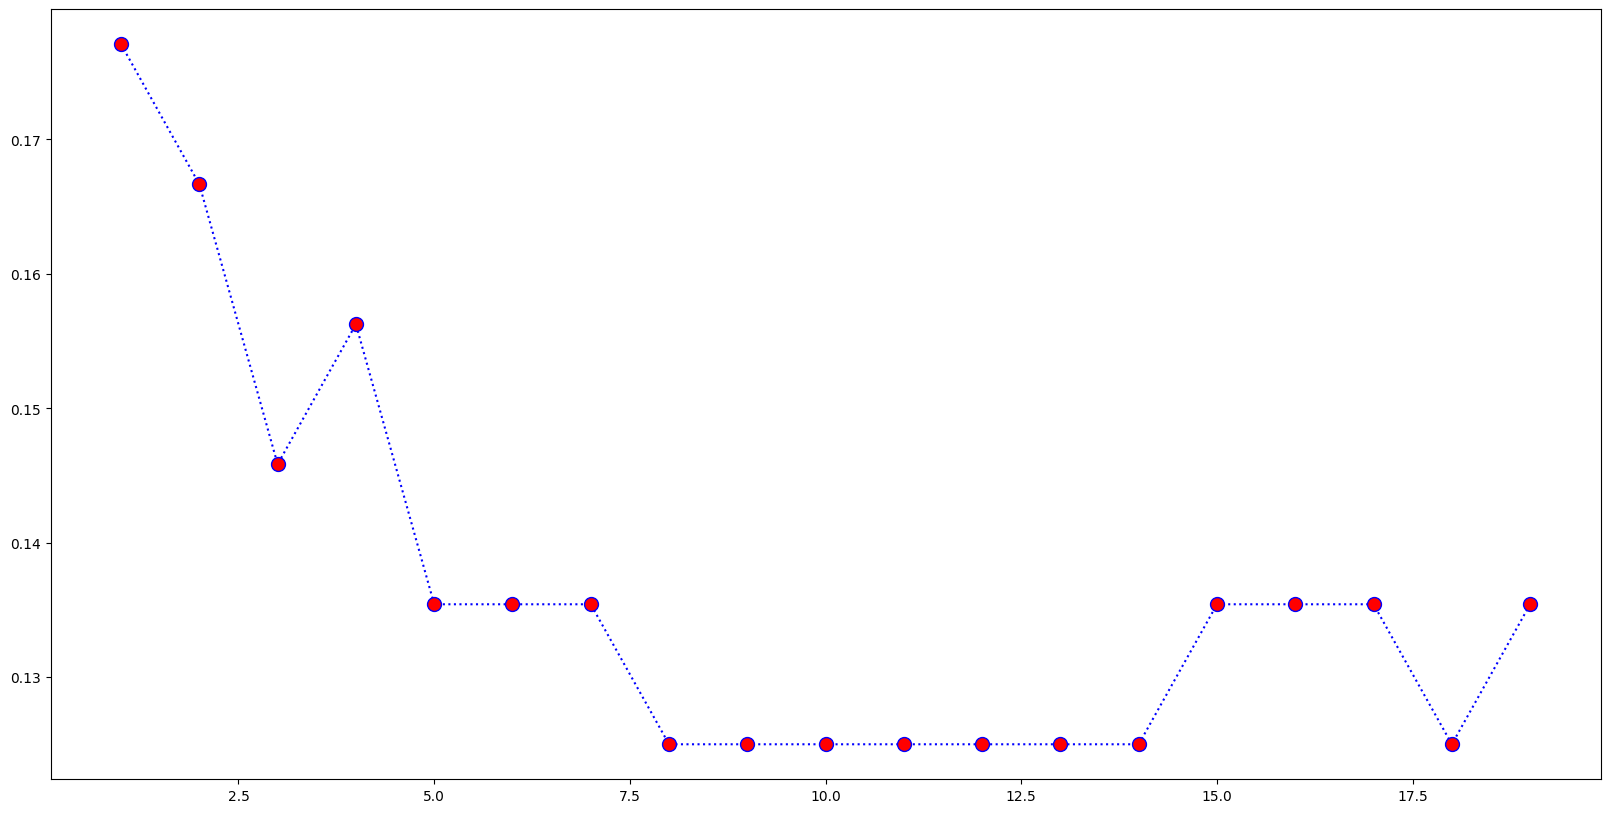

In [51]:
err = []
for i in range(1,20):
    rfe = RandomForestClassifier(n_estimators=i*10,random_state=42)
    rfe.fit(X_train,y_train)
    errpred = rfe.predict(X_test) #
    err.append(np.mean(errpred != y_test))

RandomForestClassifier

plt.figure(figsize=(20,10))
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=10)#어떻게 그릴 것인가 선택
plt.title = 'Number of estimators VS Error Rates' #title
plt.xlabel = 'Estimators' #X label
plt.ylabel= 'Error Rate' # Y label
plt.show()

In [65]:
rfc = RandomForestClassifier(n_estimators=80,max_features='auto', max_depth=9,min_samples_leaf=1,
                             min_samples_split=2,bootstrap=True, random_state = 42)
rfc.fit(X_train,y_train)
rtr=rfc.predict(X_train)
rfcpred = rfc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.89      0.88      0.88        48
           2       0.86      0.82      0.84        22

    accuracy                           0.89        96
   macro avg       0.88      0.88      0.88        96
weighted avg       0.89      0.89      0.88        96



Confusion matrix


<Axes: >

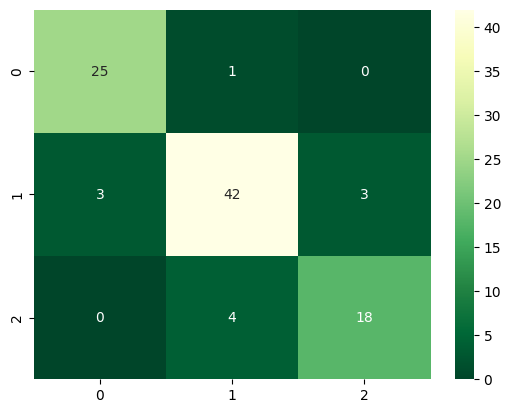

In [66]:
print('Random Forest Classifier' + '\n')
print(classification_report(y_test,rfcpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,rfcpred),cmap='YlGn_r',annot=True,fmt='g')

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, rfcpred)*100)
print(accuracy_score(y_train, rtr)*100)

88.54166666666666
98.69791666666666


###Random Forest Classifier is overfitted.

Support Vector Classifier

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.79      0.88      0.83        48
           2       0.80      0.73      0.76        22

    accuracy                           0.82        96
   macro avg       0.84      0.80      0.82        96
weighted avg       0.83      0.82      0.82        96



Confusion matrix


<Axes: >

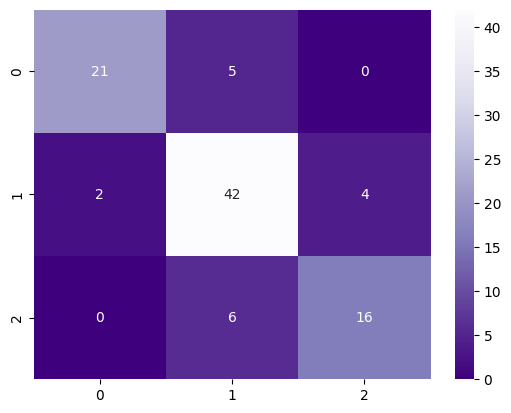

In [69]:
svc = SVC(C=100,random_state=42,gamma=1)
svc.fit(X_train,y_train)
s=svc.predict(X_train)
svcpred = svc.predict(X_test)
print('Support Vector Classifier' + '\n')
print(classification_report(y_test,svcpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,svcpred),cmap='Purples_r',annot=True,fmt='g')

In [70]:
print(accuracy_score(y_test, svcpred)*100)
print(accuracy_score(y_train, s)*100)

82.29166666666666
99.73958333333334


###Support Vector Classifier is overfitted.

Desicion Tree Classifier

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.80      0.81      0.80        48
           2       0.75      0.82      0.78        22

    accuracy                           0.80        96
   macro avg       0.81      0.80      0.80        96
weighted avg       0.81      0.80      0.80        96



Confusion matrix


<Axes: >

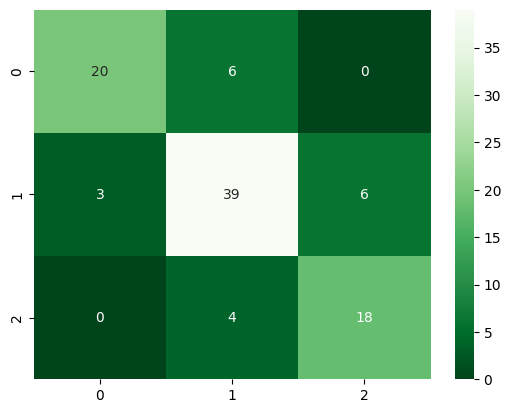

In [71]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_split=4, min_samples_leaf=1, random_state=1)
dt.fit(X_train,y_train)
d=dt.predict(X_train)
dtpred = dt.predict(X_test)
print('Desicion Tree Classifier' + '\n')
print(classification_report(y_test,dtpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,dtpred),cmap='Greens_r',annot=True,fmt='g')

In [73]:


print(accuracy_score(y_test, dtpred)*100)
print(accuracy_score(y_train, d)*100)

80.20833333333334
88.02083333333334


###**Conclusion**:Decision tree is the best classifier for this problem statement.